In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv( '../database/inmuebles_bogota.csv' )
col = {
    'Tipo': 'type',
    'Descripcion':'description',
    'Habitaciones':'bedrooms',
    'Baños':'bathrooms',
    'Área':'area',
    'Barrio':'mayoralty',
    'UPZ':'suburb',
    'Valor':'value'
}
df = df.rename( columns = col )
value = df['value'].str.split( expand = True )
df['currency'] = value[0]
df['price'] = value[1]
df['price'] = df['price'].str.replace( '.', '', regex = True )
df['price_K'] = df['price'].astype( 'float' ) / 1000000
pd.set_option( 'display.precision', 2 )
pd.set_option( 'display.float_format', lambda x: '%.2f' % x )

In [2]:
df['value_m2_K'] = df['price_K'] / df['area']
df.head(3)

,type,description,bedrooms,bathrooms,area,mayoralty,suburb,value,currency,price,price_K,value_m2_K
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78


In [3]:
df.groupby('mayoralty').mean()

/tmp/ipykernel_32874/2430547072.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('mayoralty').mean()


,bedrooms,bathrooms,area,price_K,value_m2_K
mayoralty,,,,,
Alameda,3.00,2.00,97.00,580.00,5.98
Alhambra,3.00,2.94,190.41,752.35,4.33
Andes Norte,3.00,2.86,124.86,709.57,6.05
Antonio Nariño,4.31,2.50,163.06,459.22,3.53
Barrancas,2.87,2.13,70.20,314.13,4.42
...,...,...,...,...,...
Villa Maria,4.69,3.69,207.15,402.85,2.04
Villas De Granada,3.45,2.32,86.59,282.30,3.17
Villemar,2.94,2.06,76.89,303.83,3.99


In [4]:
mayoralty_data = df.groupby('mayoralty').sum()
mayoralty_data

/tmp/ipykernel_32874/2944335160.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mayoralty_data = df.groupby('mayoralty').sum()


,bedrooms,bathrooms,area,price_K,value_m2_K
mayoralty,,,,,
Alameda,3,2,97,580.00,5.98
Alhambra,51,50,3237,12790.00,73.56
Andes Norte,21,20,874,4967.00,42.35
Antonio Nariño,207,120,7827,22042.65,169.47
Barrancas,43,32,1053,4712.00,66.24
...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58
Villas De Granada,76,51,1905,6210.62,69.71
Villemar,53,37,1384,5469.00,71.81


In [5]:
mayoralty_data['value_m2_mayoralty'] = mayoralty_data['price_K'] / mayoralty_data['area']
mayoralty_data

,bedrooms,bathrooms,area,price_K,value_m2_K,value_m2_mayoralty
mayoralty,,,,,,
Alameda,3,2,97,580.00,5.98,5.98
Alhambra,51,50,3237,12790.00,73.56,3.95
Andes Norte,21,20,874,4967.00,42.35,5.68
Antonio Nariño,207,120,7827,22042.65,169.47,2.82
Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58,1.94
Villas De Granada,76,51,1905,6210.62,69.71,3.26
Villemar,53,37,1384,5469.00,71.81,3.95


Creamos un dicionario con la funcion dict 

In [6]:
matoralty_m2 = dict( mayoralty_data['value_m2_mayoralty'] )

Con la funcion map tiene la misma funcion que un forech con la unica diferancai que es ma eficiente y rapido al momento de evaluar

In [7]:
df['value_m2_mayoralty'] = df['mayoralty']
df['value_m2_mayoralty'] = df['value_m2_mayoralty'].map(matoralty_m2)
df.head()

,type,description,bedrooms,bathrooms,area,mayoralty,suburb,value,currency,price,price_K,value_m2_K,value_m2_mayoralty
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14,4.57
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94,3.40
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78,8.10
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00,5.78,5.66
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00,7.58,6.29


El objeto resultante estará en orden descendente, de modo que el primer elemento sea el que aparezca con más frecuencia. Excluye valores NA por defecto, esta es la función de la funcio value_counts

In [8]:
top_df = df['mayoralty'].value_counts()[:10].index

Restablezca el índice del DataFrame y use el predeterminado en su lugar. Si el DataFrame tiene un MultiIndex, este método puede eliminar uno o más niveles, esta es la función de la funcio reset_index
* inplace ==> Ya sea para modificar el DataFrame en lugar de crear uno nuevo.

In [9]:
mayoralty_data.reset_index( inplace = True )
mayoralty_data

,mayoralty,bedrooms,bathrooms,area,price_K,value_m2_K,value_m2_mayoralty
0,Alameda,3,2,97,580.00,5.98,5.98
1,Alhambra,51,50,3237,12790.00,73.56,3.95
2,Andes Norte,21,20,874,4967.00,42.35,5.68
3,Antonio Nariño,207,120,7827,22042.65,169.47,2.82
4,Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...,...
144,Villa Maria,61,48,2693,5237.00,26.58,1.94
145,Villas De Granada,76,51,1905,6210.62,69.71,3.26
146,Villemar,53,37,1384,5469.00,71.81,3.95
147,Zona Franca,2,1,54,160.00,2.96,2.96


La funcion query consulta las columnas de un DataFrame con una expresión booleana.

Su propiedad en String:

La cadena de consulta para evaluar.

Puede hacer referencia a las variables en el entorno prefijándolas con un carácter '@' como @a + b.

Puede hacer referencia a nombres de columnas que no son nombres de variables de Python válidos rodeándolos con acentos graves. Por lo tanto, los nombres de las columnas que contengan espacios o signos de puntuación (además de los guiones bajos) o que comiencen con dígitos deben estar rodeados de acentos graves. (Por ejemplo, una columna denominada "Área (cm^2)" se referenciaría como `Área (cm^2)`). Los nombres de columna que son palabras clave de Python (como "lista", "para", "importar", etc.) no se pueden usar.

Por ejemplo, si una de tus columnas se llama a a y quieres sumarla con b, tu consulta debería ser `a a` + b.

In [10]:
mayoralty_data.query('mayoralty in @top_df')

,mayoralty,bedrooms,bathrooms,area,price_K,value_m2_K,value_m2_mayoralty
5,Barrios Unidos,1525,1196,87799,259877.76,2070.61,2.96
10,Bosa,1743,789,34879,93400.56,1654.36,2.68
22,Cedritos,1458,1348,53711,270027.73,2853.23,5.03
24,Chapinero,892,913,81248,372130.93,2466.03,4.58
50,Engativa,1676,1077,59808,172711.73,1795.71,2.89
63,Kennedy,2151,1233,61475,207963.65,2127.66,3.38
125,Santa Barbara,1073,1162,54693,320097.80,2701.88,5.85
132,Suba,1497,1202,61615,266406.04,2000.72,4.32
138,Usaquén,3109,3044,148121,837710.36,6334.04,5.66
148,Zona Noroccidental,2778,2204,119084,544453.06,4049.16,4.57


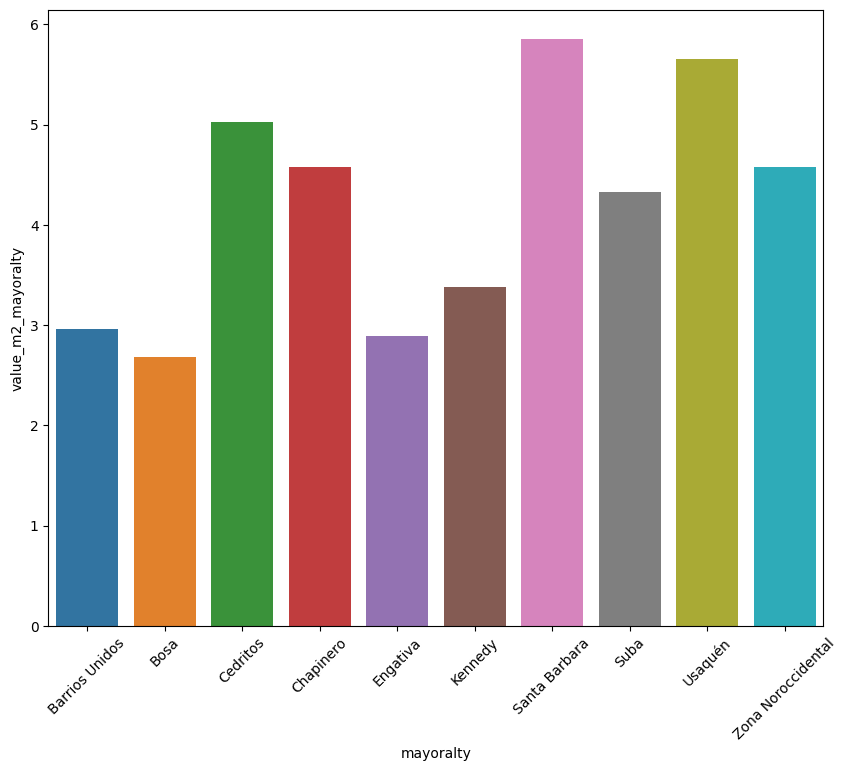

In [11]:
plt.figure( figsize = ( 10, 8 ) )
ax = sns.barplot( x = 'mayoralty', y = 'value_m2_mayoralty', data = mayoralty_data.query('mayoralty in @top_df') )
ax.tick_params( axis = 'x', rotation = 45 )

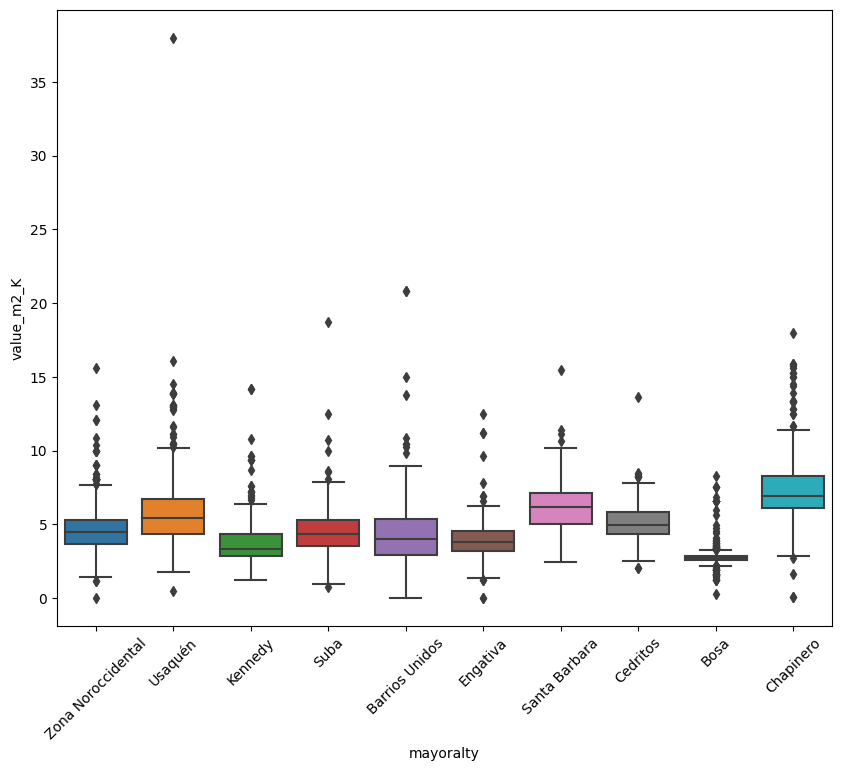

In [12]:
plt.figure( figsize = ( 10, 8 ) )
ax = sns.boxplot( x = 'mayoralty', y = 'value_m2_K', data = df.query('mayoralty in @top_df') )
ax.tick_params( axis = 'x', rotation = 45 )
plt.show()

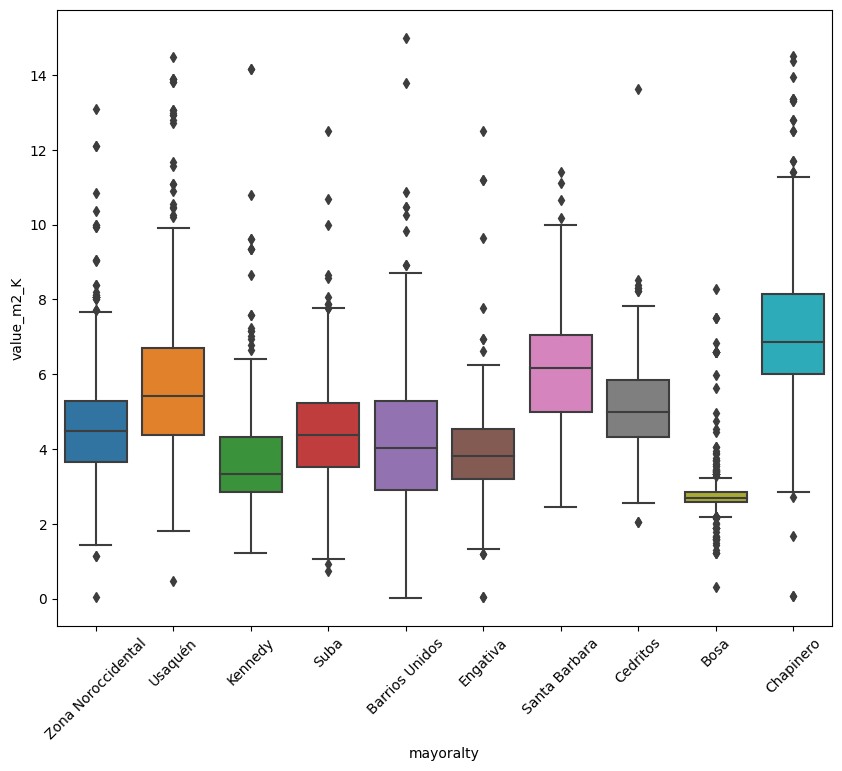

In [13]:
plt.figure( figsize = ( 10, 8 ) )
ax = sns.boxplot( x = 'mayoralty', y = 'value_m2_K', data = df.query('mayoralty in @top_df & value_m2_K < 15') )
ax.tick_params( axis = 'x', rotation = 45 )
plt.show()

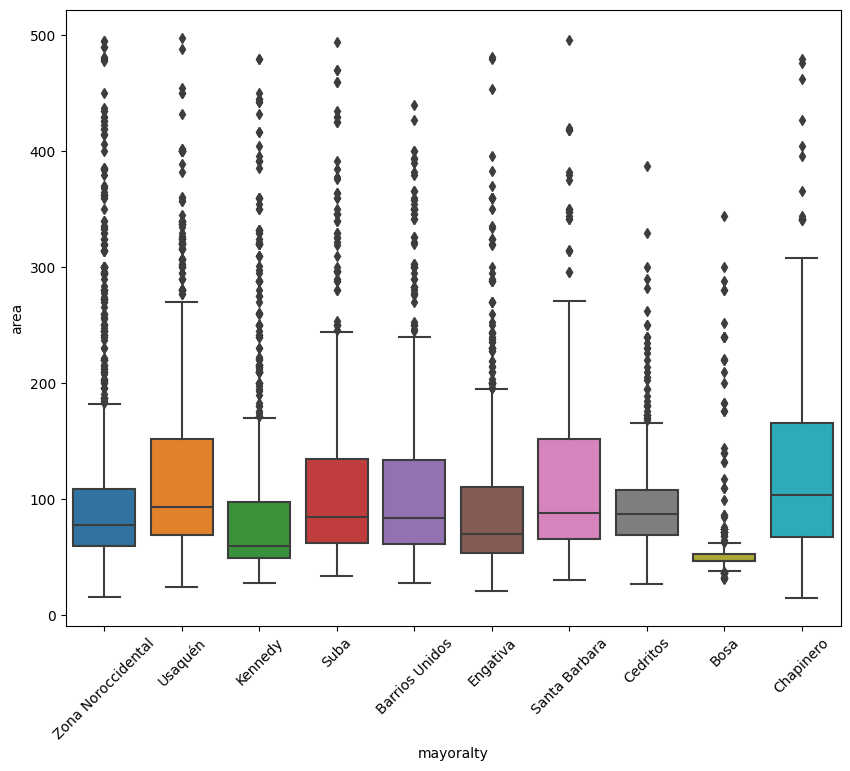

In [14]:
plt.figure( figsize = ( 10, 8 ) )
ax = sns.boxplot( x = 'mayoralty', y = 'area', data = df.query('mayoralty in @top_df & area < 500') )
ax.tick_params( axis = 'x', rotation = 45 )
plt.show()

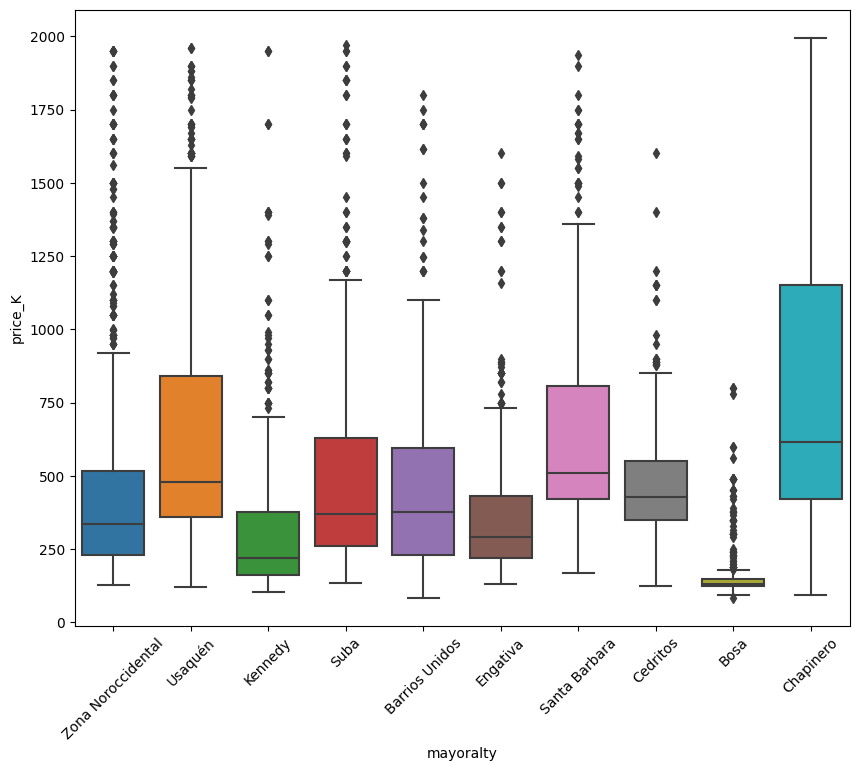

In [15]:
plt.figure( figsize = ( 10, 8 ) )
ax = sns.boxplot( x = 'mayoralty', y = 'price_K', data = df.query('mayoralty in @top_df & price_K < 2000') )
ax.tick_params( axis = 'x', rotation = 45 )
plt.show()

Con la propiedad encoding se establece al tipo de formta del documento ejemplo UTF-8

Con sep separamos la base por lo que divide el docmento ejemplo ";"

In [16]:
data_a = pd.read_csv( '../database/Identificación (Capítulo A).csv', encoding = 'latin-1', sep = ';' )
data_a.head()

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.00,11,11001,1,14.00,Los Mártires,37.00,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"


In [17]:
data_a.shape

(106467, 11)

In [18]:
data_a = data_a.loc[ data_a['MPIO'] == 11001 ]
data_a.shape

(86504, 11)

In [19]:
data_b = pd.read_csv( '../database/Datos de la vivenda y su entorno (Capítulo B).csv', encoding = 'latin-1', sep = ';')
data_c = pd.read_csv( '../database/Condiciones habitacionales del hogar (Capítulo C).csv', encoding = 'latin-1', sep = ';' )
#data_d = pd.read_csv( '../database/Servicios públicos domiciliarios y de TIC (Capítulo D).csv', encoding = 'latin-1', sep = ';' )
data_e = pd.read_csv( '../database/Composición del hogar y demografía (Capítulo E).csv', encoding = 'latin-1', sep = ';' )
#data_f = pd.read_csv( '../database/Salud (Capítulo F).csv', encoding = 'latin-1', sep = ';' )
#data_g = pd.read_csv( '../database/Atención integral de los niños y niñas menores de 5 anos (Capítulo G).csv', encoding = 'latin-1', sep = ';' )
data_h = pd.read_csv( '../database/Educaciвn (Capitulo H).csv', encoding = 'latin-1', sep = ';' )
#data_i = pd.read_csv( '../database/Uso de tecnologías de la información, TIC (Capítulo I).csv', encoding = 'latin-1', sep = ';' )
#data_j = pd.read_csv( '../database/Participación en organizaciones y redes sociales (Capítulo J).csv', encoding = 'latin-1', sep = ';' )
#data_k = pd.read_csv( '../database/Fuerza de trabajo (Capítulo K).csv', encoding = 'latin-1', sep = ';' )
data_l = pd.read_csv( '../database/Percepción sobre las condiciones de vida y el desempeño institucional (Capítulo L).csv', encoding = 'latin-1', sep = ';' )
#data_m1 = pd.read_csv( '../database/Gastos en alimentos y bebidas no alcohólicas de los hogares (Capítulo M1).csv', encoding = 'latin-1', sep = ';' )
#data_m2 = pd.read_csv( '../database/Gastos trimestrales y anuales del hogar (Capitulo M2).csv', encoding = 'latin-1', sep = ';' )

/tmp/ipykernel_32874/1790068144.py:2: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data_c = pd.read_csv( '../database/Condiciones habitacionales del hogar (Capítulo C).csv', encoding = 'latin-1', sep = ';' )
/tmp/ipykernel_32874/1790068144.py:4: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  data_e = pd.read_csv( '../database/Composición del hogar y demografía (Capítulo E).csv', encoding = 'latin-1', sep = ';' )
/tmp/ipykernel_32874/1790068144.py:7: DtypeWarning: Columns (26,81) have mixed types. Specify dtype option on import or set low_memory=False.
  data_h = pd.read_csv( '../database/Educaciвn (Capitulo H).csv', encoding = 'latin-1', sep = ';' )
/tmp/ipykernel_32874/1790068144.py:11: DtypeWarning: Columns (114,117,122,126,164,166,168) have mixed types. Specify dtype option on import or set low_memory=False.
  data_l = pd.read_csv( '../database/Percepción sobre l

con la funcion merge fucionamos nuestras variable de tal forma que se agrupan y va creciendo las filas de la tabla.

con la propiedad on indicamos que se unan unicamente las que conincidad con la que queremos unir

con la propiedad how indicamos de a que diecion se va ir agrupando.

In [20]:
all_data = pd.merge(data_a, data_b, on = 'DIRECTORIO', how = 'left')
all_data.shape

(86504, 73)

In [21]:
all_data = pd.merge(all_data, data_c, on = 'DIRECTORIO', how = 'left')
all_data.shape

(87061, 214)

In [22]:
all_data = pd.merge(all_data, data_e, on = 'DIRECTORIO', how = 'left')
all_data.shape

/tmp/ipykernel_32874/197763597.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  all_data = pd.merge(all_data, data_e, on = 'DIRECTORIO', how = 'left')


(238559, 281)

In [23]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238559 entries, 0 to 238558
Columns: 281 entries, DIRECTORIO to FEX_C_y
dtypes: float64(140), int64(126), object(15)
memory usage: 513.3+ MB
